# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

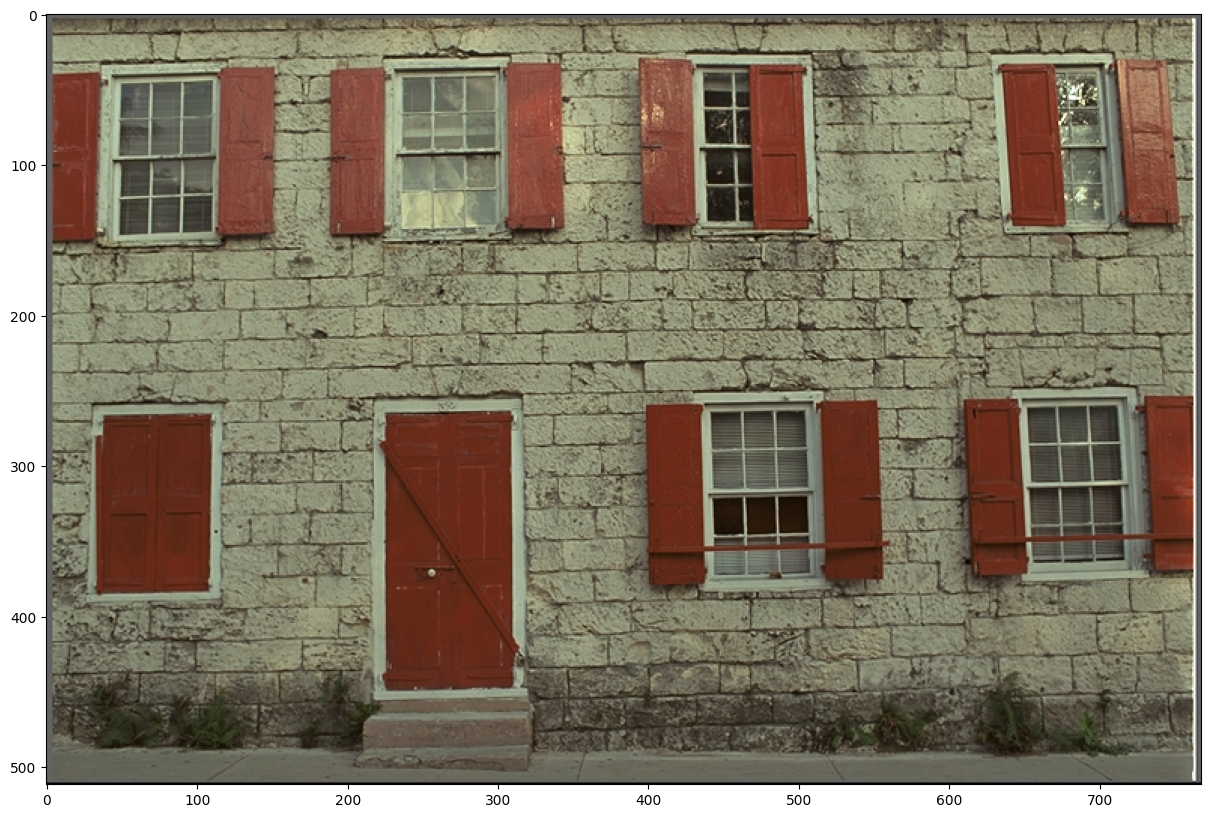

In [2]:
img = cv2.imread('../data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

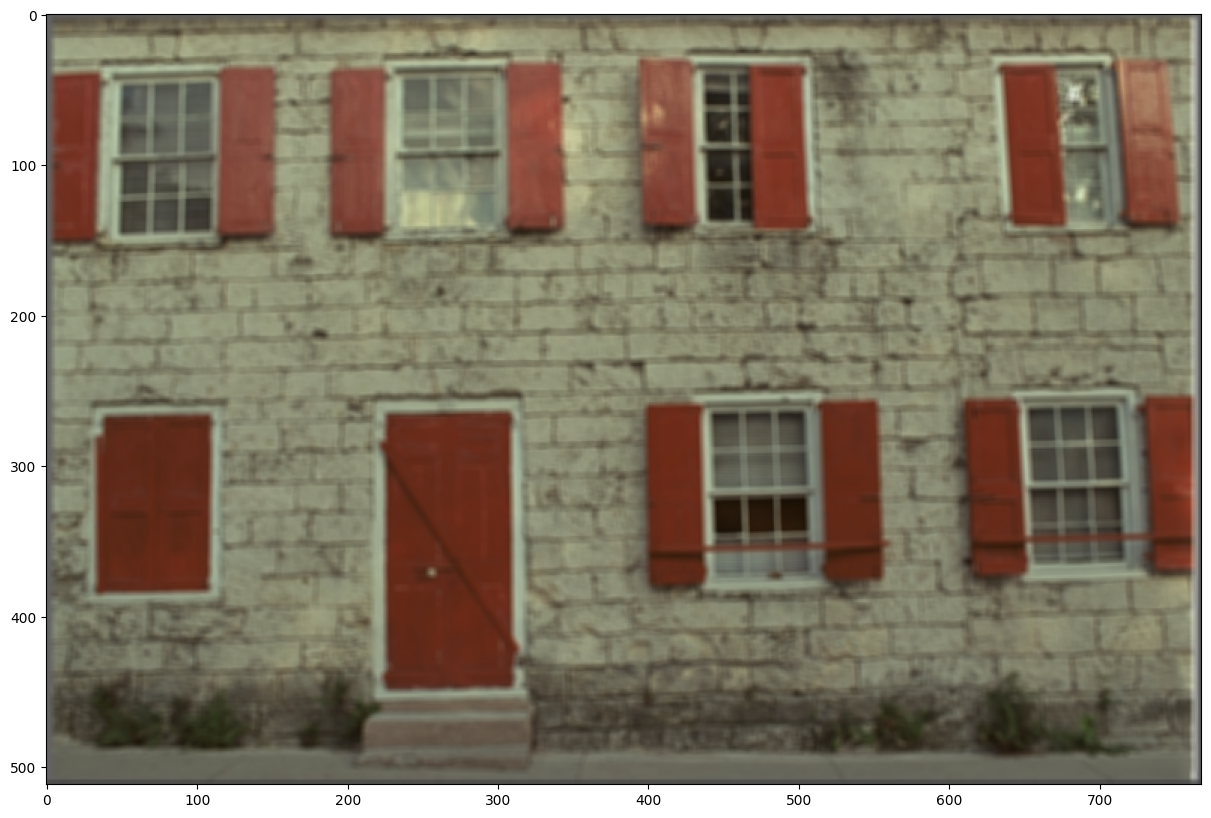

In [7]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX = 5)
plt.imshow(unsharp)

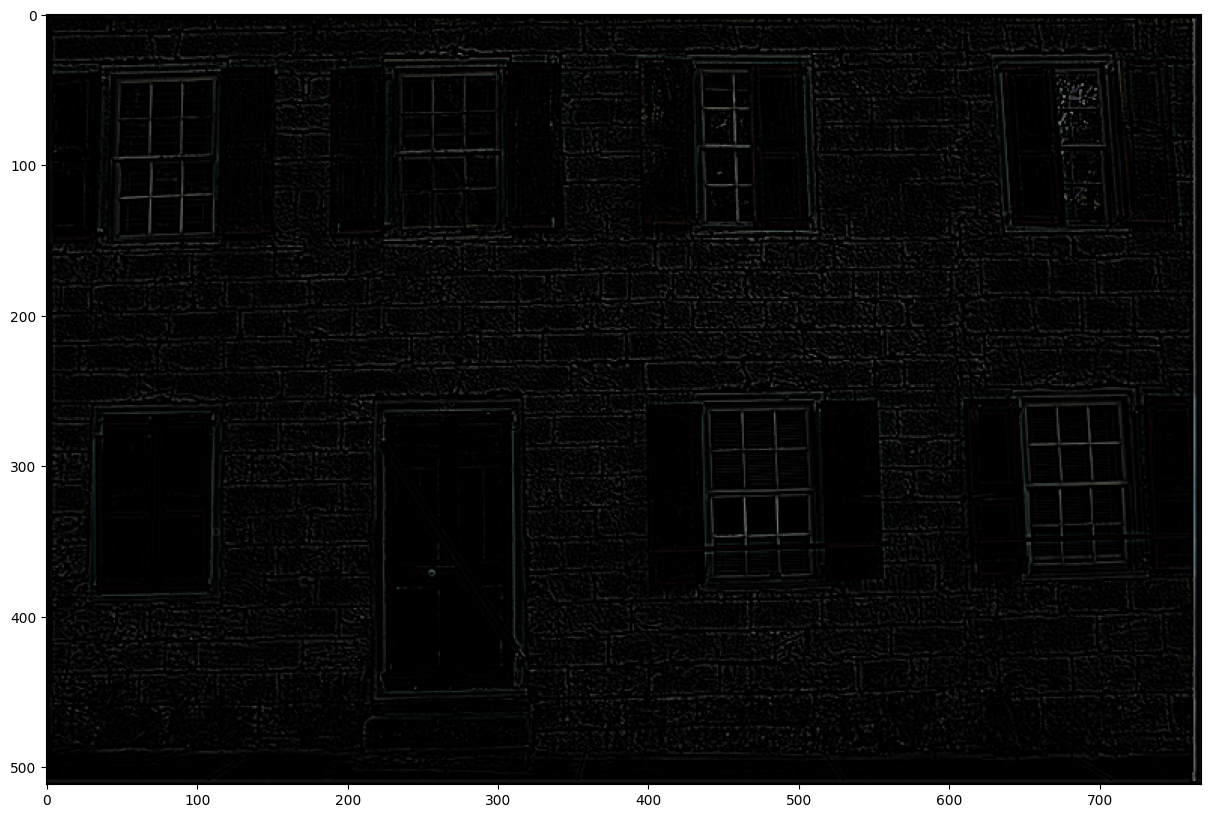

In [9]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. 
# You can prevent this by casting the images to float.
diff = img.astype(np.float32) - unsharp.astype(np.float32)
plt.imshow(diff.clip(0, 255).astype(np.uint8))

In [ ]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.

sharpened = img.astype(np.float32) + diff *1

(<Axes: title={'center': 'Large amount'}>,
 Text(0.5, 1.0, 'Large amount'))

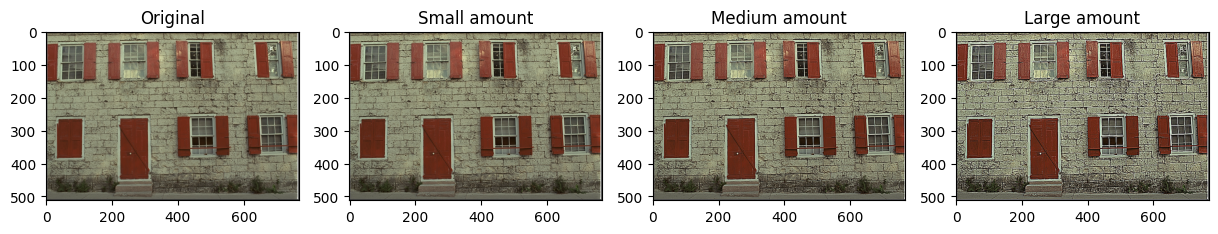

In [14]:
sharpened_small = img.astype(np.float32) + diff * 0.3
sharpened_medium = img.astype(np.float32) + diff *1.5
sharpened_large = img.astype(np.float32) + diff * 4

plt.subplot(141), plt.imshow(img), plt.title('Original')
plt.subplot(142), plt.imshow(sharpened_small.clip(0, 255).astype(np.uint8)), plt.title('Small amount')
plt.subplot(143), plt.imshow(sharpened_medium.clip(0, 255).astype(np.uint8)), plt.title('Medium amount')
plt.subplot(144), plt.imshow(sharpened_large.clip(0, 255).astype(np.uint8)), plt.title('Large amount')

### Questions
* What is a good (reasonable) value for the `amount` parameter?
Approximately the value between 0.5 and 1.5 for the radius 0.5 to 2 (in my case the radius = 2). But this value depends on the radius. The higher radius (the size of a filtering window) = the lower the amount. 
 * What happens if it is too small?
No changes (or very little) are observable.
 * What happens if it is too large?
The image becomes noisy and unnaturally contrast.